# IMPORT LIBRARIES

## Usage
## This notebook serves as a starting point for the analysis which will be completed for each of the methods. It is important that the same data and dataformat feed into the analysis for consistency purposes

- Import libraries
- Update filepath directory
- Activate import variables + functions
- Import raw data
- Convert data to a a 3072 dimension vector for each image

## Import libraries

In [1]:
import numpy as np
import pickle
import os
#import download
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [27]:
import sklearn
from sklearn import utils
from sklearn.utils import graph_shortest_path
from matplotlib.pyplot import figure
%matplotlib notebook
from pylab import scatter,text,show,cm,figure
from pylab import subplot,imshow,NullLocator
from sklearn import manifold, datasets
from sklearn.manifold import Isomap
import winsound
from sklearn.metrics import confusion_matrix

#import ggplot


## Update filepath directory

In [3]:

########################################################################
#Filepath for the CIFAR data
# Set this before you start calling any of the functions below.
data_path = "C:\\WPI\\UnsupervisedLearning\\FinalProject\\cifar\\" 

## Activate import variables and functions

In [4]:
########################################################################
# Various constants for the size of the images.
# Use these constants in your own program.

# Width and height of each image.
img_size = 32

# Number of channels in each image, 3 channels: Red, Green, Blue.
num_channels = 3

# Length of an image when flattened to a 1-dim array.
img_size_flat = img_size * img_size * num_channels

# Number of classes.
num_classes = 10

########################################################################
# Various constants used to allocate arrays of the correct size.

# Number of files for the training-set.
_num_files_train = 5

# Number of images for each batch-file in the training-set.
_images_per_file = 10000

# Total number of images in the training-set.
# This is used to pre-allocate arrays for efficiency.
_num_images_train = _num_files_train * _images_per_file

########################################################################
# Private functions for downloading, unpacking and loading data-files.


def _get_file_path(filename=""):
    """
    Return the full path of a data-file for the data-set.
    If filename=="" then return the directory of the files.
    """

    return os.path.join(data_path,  filename)


def _unpickle(filename):
    """
    Unpickle the given file and return the data.
    Note that the appropriate dir-name is prepended the filename.
    """

    # Create full path for the file.
    file_path = _get_file_path(filename)

    print("Loading data: " + file_path)

    with open(file_path, mode='rb') as file:
        # In Python 3.X it is important to set the encoding,
        # otherwise an exception is raised here.
        data = pickle.load(file, encoding='bytes')

    return data


def _convert_images(raw):
    """
    Convert images from the CIFAR-10 format and
    return a 4-dim array with shape: [image_number, height, width, channel]
    where the pixels are floats between 0.0 and 1.0.
    """

    # Convert the raw images from the data-files to floating-points.
    raw_float = np.array(raw, dtype=float) / 255.0

    # Reshape the array to 4-dimensions.
    images = raw_float.reshape([-1, num_channels, img_size, img_size])

    # Reorder the indices of the array.
    images = images.transpose([0, 2, 3, 1])

    return images


def _load_data(filename):
    """
    Load a pickled data-file from the CIFAR-10 data-set
    and return the converted images (see above) and the class-number
    for each image.
    """

    # Load the pickled data-file.
    data = _unpickle(filename)

    # Get the raw images.
    raw_images = data[b'data']

    # Get the class-numbers for each image. Convert to numpy-array.
    cls = np.array(data[b'labels'])

    # Convert the images.
    images = _convert_images(raw_images)

    return images, cls


########################################################################
# Public functions that you may call to download the data-set from
# the internet and load the data into memory.


def load_class_names():
    """
    Load the names for the classes in the CIFAR-10 data-set.
    Returns a list with the names. Example: names[3] is the name
    associated with class-number 3.
    """

    # Load the class-names from the pickled file.
    raw = _unpickle(filename="batches.meta")[b'label_names']

    # Convert from binary strings.
    names = [x.decode('utf-8') for x in raw]

    return names


def load_training_data():
    """
    Load all the training-data for the CIFAR-10 data-set.
    The data-set is split into 5 data-files which are merged here.
    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    # Pre-allocate the arrays for the images and class-numbers for efficiency.
    images = np.zeros(shape=[_num_images_train, img_size, img_size, num_channels], dtype=float)
    cls = np.zeros(shape=[_num_images_train], dtype=int)

    # Begin-index for the current batch.
    begin = 0

    # For each data-file.
    for i in range(_num_files_train):
        # Load the images and class-numbers from the data-file.
        images_batch, cls_batch = _load_data(filename="data_batch_" + str(i + 1))

        # Number of images in this batch.
        num_images = len(images_batch)

        # End-index for the current batch.
        end = begin + num_images

        # Store the images into the array.
        images[begin:end, :] = images_batch

        # Store the class-numbers into the array.
        cls[begin:end] = cls_batch

        # The begin-index for the next batch is the current end-index.
        begin = end

    return images, cls


def load_test_data():
    """
    Load all the test-data for the CIFAR-10 data-set.
    Returns the images, class-numbers and one-hot encoded class-labels.
    """

    images, cls = _load_data(filename="test_batch")

    return images, cls

## Import raw data

In [5]:
########################################################################
#Import image data using import functions     
raw_images, cls=load_training_data()


#Print variable to confirm import correctly
print(raw_images[1:2]) 
#######################################################################

Loading data: C:\WPI\UnsupervisedLearning\FinalProject\cifar\data_batch_1
Loading data: C:\WPI\UnsupervisedLearning\FinalProject\cifar\data_batch_2
Loading data: C:\WPI\UnsupervisedLearning\FinalProject\cifar\data_batch_3
Loading data: C:\WPI\UnsupervisedLearning\FinalProject\cifar\data_batch_4
Loading data: C:\WPI\UnsupervisedLearning\FinalProject\cifar\data_batch_5
[[[[0.60392157 0.69411765 0.73333333]
   [0.49411765 0.5372549  0.53333333]
   [0.41176471 0.40784314 0.37254902]
   ...
   [0.35686275 0.37254902 0.27843137]
   [0.34117647 0.35294118 0.27843137]
   [0.30980392 0.31764706 0.2745098 ]]

  [[0.54901961 0.62745098 0.6627451 ]
   [0.56862745 0.6        0.60392157]
   [0.49019608 0.49019608 0.4627451 ]
   ...
   [0.37647059 0.38823529 0.30588235]
   [0.30196078 0.31372549 0.24313725]
   [0.27843137 0.28627451 0.23921569]]

  [[0.54901961 0.60784314 0.64313725]
   [0.54509804 0.57254902 0.58431373]
   [0.45098039 0.45098039 0.43921569]
   ...
   [0.30980392 0.32156863 0.2509803

## Verify correct import

In [6]:
#Check data type--> should by np array
type(raw_images)
#Check number of images --> should be 50000
print(len(raw_images))

#Check data dimensions
#Correct dimensions:
print(3072*50000)
#Imported Dimensions
print(raw_images.size)
raw_images.shape

50000
153600000
153600000


(50000, 32, 32, 3)

## Convert original array to correct 3072 dim array per image

In [7]:
images_flat=raw_images.ravel()

In [8]:
X = images_flat.reshape(-1, img_size_flat)

In [9]:
sub_ind=np.random.choice(len(raw_images),5000,replace=False)

In [10]:
labels_subset=cls[np.where(sub_ind)]
X_subset=X[np.where(sub_ind)]
print(X_subset.shape)
print(labels_subset)

(5000, 3072)
[6 9 9 ... 5 4 6]


# ISOMap Algorithm Methods

In [12]:
def plot_isomap(data,size):
    import time
    start_time = time.time()
    scatter(data[:,0], data[:,1], c='k', alpha=0.3, s=10)
    show()

    

In [20]:
def plot_isomap_3d(data,labels):
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    %matplotlib notebook

    df_2 = pd.DataFrame(data)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df_2[0], df_2[1], c=labels, s=30)
    ax.view_init(30, 185)
    plt.show()

# Time complexity Analysis

In [46]:
unique, counts = np.unique(labels_subset, return_counts=True)
dict(zip(unique, counts))


{0: 505,
 1: 460,
 2: 519,
 3: 486,
 4: 519,
 5: 488,
 6: 519,
 7: 486,
 8: 520,
 9: 498}

# Run PCA on color image vectors

In [74]:
#RUN PCA on images
pca = PCA(n_components=img_size_flat)
pca.fit(X_subset)
principalComponents = pca.fit_transform(X_subset)

In [16]:
#PRINT Explained Variance Ratio
print('\n Explained Variance')
print(pca.explained_variance_ratio_) 
print('\nSingular Values')
print(pca.singular_values_) 
print('\nCumulative Explained Variance')
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)


 Explained Variance
[2.90766299e-01 1.12531437e-01 6.69441396e-02 ... 8.64946450e-09
 8.45232138e-09 8.33587056e-09]

Singular Values
[1.66376404e+03 1.03503880e+03 7.98318108e+02 ... 2.86955338e-01
 2.83666271e-01 2.81705405e-01]

Cumulative Explained Variance
[29.08 40.33 47.02 ... 98.77 98.77 98.77]


In [18]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

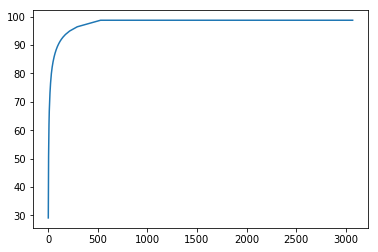

In [19]:
plt.plot(var1)

# CHECK WITH MNIST

## Import MNIST and run methods to verify accurate

In [14]:
from pylab import scatter,text,show,cm,figure
from pylab import subplot,imshow,NullLocator
from sklearn import manifold, datasets

# load the digits dataset
# 901 samples, about 180 samples per class 
# the digits represented 0,1,2,3,4
digits = datasets.load_digits(n_class=5)
digitsdata = digits.data
print(digits.data)
print(X.shape)
color = digits.target


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  0. ...  9.  0.  0.]
 [ 0.  0.  0. ...  4.  0.  0.]
 [ 0.  0.  6. ...  6.  0.  0.]]
(901, 64)


In [18]:
iso_digits, time=build_isomap(digitsdata, 901, 2)

embedding created
--- 901 records ---
--- 0.595562219619751 seconds ---


In [17]:
print(iso_digits)

(array([[ 159.53129996,  -38.13940564],
       [ -92.99852505,  -53.69203808],
       [-109.48862686,   53.53902863],
       ...,
       [   3.58672519, -120.07371426],
       [   7.70298862, -103.76327626],
       [ 114.75123666,  -63.71833372]]), 0.7943835258483887)


<IPython.core.display.Javascript object>


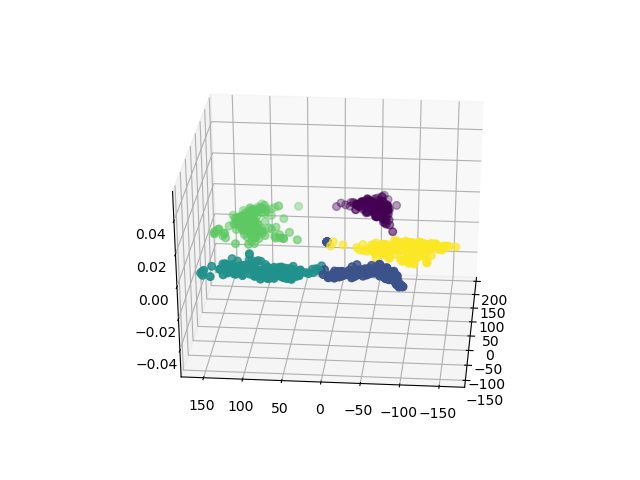

In [21]:
data=iso_digits
labels=color
plot_isomap_3d(data,labels)

# CLASSIFICATION

## Split into train/test

In [24]:
def train_test(data,labels):    
    from sklearn.model_selection import train_test_split 
    df_2 = pd.DataFrame(data)
    X = df_2
    y = labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
    
    return(X_train, X_test, y_train, y_test)

In [25]:
X_train, X_test, y_train, y_test=train_test(data, labels)

## RUN KNN MODEL

In [28]:
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print(accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions)
print(cm)

0.995575221238938
[[44  0  0  0  0]
 [ 0 45  1  0  0]
 [ 0  0 47  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 42]]


## RUN SVM Model

In [29]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
print(cm)
print(accuracy)

[[44  0  0  0  0]
 [ 0 45  1  0  0]
 [ 0  0 47  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 42]]
0.995575221238938
